## 批量梯度下降法（Batch Gradient Descent）
速度慢，稳定
## 随机梯度下降法（Stochastic Gradient Descent）
速度快，但是不一定每次都朝着最小的方向前进
通过循环m轮，每一轮将打乱的样本逐一计算，保证考虑每一个元素
## 小批量梯度下降法（Mini-Batch Gradient Descent）
每次看k个样本（10个，20个），兼顾了上面两者的优点
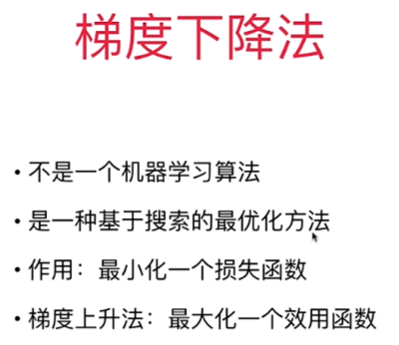

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
    except:
        return float('inf')

In [45]:
def dJ_math(theta, X_b_k, y_k):
    return X_b_k.T.dot(X_b_k.dot(theta) - y_k) * 2. / len(y_k)

In [21]:
def mbdg(X_b, y, initial_theta, k=10, n_iters=1):

    m = len(X_b)
    t0=5
    t1=50
    
    def learning_rate(t):
        return t0 / (t + t1)
    
    theta = initial_theta
    for cur_iter in range((m * n_iters) // k):
        rand_k = np.random.randint(m, size=(k))
        gradient = dJ_math(theta, X_b[rand_k], y[rand_k])
        theta = theta - learning_rate(cur_iter) * gradient
    ## ML中有修改完善过的代码
    return theta

In [4]:
n = 100000

x = np.random.normal(size=n)
X = x.reshape(-1,1)
y = 4.*x + 3. + np.random.normal(0, 3, size=n)

X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])

In [24]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = mbdg(X_b, y, initial_theta)

Wall time: 307 ms


In [1]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [2]:
from ML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [4]:
from sklearn.preprocessing import StandardScaler

standarScaler = StandardScaler()
standarScaler.fit(X_train)
X_train_standard = standarScaler.transform(X_train)
X_test_standard = standarScaler.transform(X_test)

In [5]:
from ML.LinearRegression import LinearRegression
lin_reg1 = LinearRegression()
lin_reg2 = LinearRegression()
lin_reg3 = LinearRegression()

In [8]:
%time lin_reg1.fit_gd(X_train_standard, y_train, n_iters=3920)
lin_reg1.score(X_test_standard, y_test)

Wall time: 215 ms


0.8129978430900638

In [58]:
%time lin_reg2.fit_sgd(X_train_standard, y_train, n_iters=5000)
lin_reg2.score(X_test_standard, y_test)

Wall time: 9.49 s


0.8129857062946049

In [9]:
%time lin_reg3.fit_mbgd(X_train_standard, y_train, n_iters=5000)
lin_reg3.score(X_test_standard, y_test)

Wall time: 2.49 s


0.8129792768920285